Shape of dataset: (1797, 64)
Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360


Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  

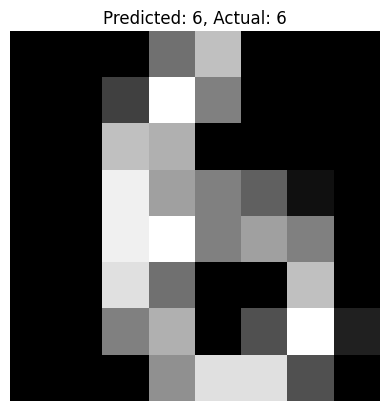

In [3]:
# Exercise 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load handwritten digits dataset (0-9)
digits = load_digits()

print("Shape of dataset:", digits.data.shape)  # (1797, 64) → 1797 samples, 8x8 images flattened

# Prepare train/test data
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # try k=3
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Test with a random digit
plt.imshow(X_test[0].reshape(8, 8), cmap='gray')
plt.title(f"Predicted: {y_pred[0]}, Actual: {y_test[0]}")
plt.axis('off')
plt.show()

In [5]:
# Exercise 2

import numpy as np
import pandas as pd

# Dataset
data = {
    'Brightness': [40, 50, 60, 10, 70, 60, 25],
    'Saturation': [20, 50, 90, 25, 70, 10, 80],
    'Class': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue']
}

df = pd.DataFrame(data)
print("Dataset:\n", df)

# New entry (example: Brightness=55, Saturation=60)
new_entry = np.array([55, 60])

# Euclidean distance formula
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Calculate distances
distances = []
for i, row in df.iterrows():
    existing_point = np.array([row['Brightness'], row['Saturation']])
    dist = euclidean_distance(new_entry, existing_point)
    distances.append(dist)
    print(f"Distance from {new_entry} to ({row['Brightness']}, {row['Saturation']}) [{row['Class']}] = {dist:.2f}")

# Add distances to dataframe
df['Distance'] = distances
print("\nFinal Table with Distances:\n", df)


Dataset:
    Brightness  Saturation Class
0          40          20   Red
1          50          50  Blue
2          60          90  Blue
3          10          25   Red
4          70          70  Blue
5          60          10   Red
6          25          80  Blue
Distance from [55 60] to (40, 20) [Red] = 42.72
Distance from [55 60] to (50, 50) [Blue] = 11.18
Distance from [55 60] to (60, 90) [Blue] = 30.41
Distance from [55 60] to (10, 25) [Red] = 57.01
Distance from [55 60] to (70, 70) [Blue] = 18.03
Distance from [55 60] to (60, 10) [Red] = 50.25
Distance from [55 60] to (25, 80) [Blue] = 36.06

Final Table with Distances:
    Brightness  Saturation Class   Distance
0          40          20   Red  42.720019
1          50          50  Blue  11.180340
2          60          90  Blue  30.413813
3          10          25   Red  57.008771
4          70          70  Blue  18.027756
5          60          10   Red  50.249378
6          25          80  Blue  36.055513
